<a href="https://colab.research.google.com/github/edytamejlun123/UczenieMaszynowe/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)['frame']

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [158]:
print("ile wierszy: ", len(data))

ile wierszy:  20640


In [159]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.arange(80).reshape((20, 4))  # tablica zawierajace atrybuty warunkowe
# y = range(5)  # tablica zawierajaca jeden atrybut decyzyjny
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


len(X), len(X_train), len(X_test)
assert len(X) == len(X_train) + len(X_test)

X = np.arange(80).reshape((20, 4))  # tablica zawierajace atrybuty warunkowe
y = range(20)  # tablica zawierajaca jeden atrybut decyzyjny
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
len(X_train), len(y_train), len(X_test), len(y_test)

(16, 16, 4, 4)

In [161]:
data_size = len(data)
half_data_size = data_size // 2
data['decision'] = np.array([0] * half_data_size + [1] * half_data_size)

In [162]:
from sklearn.model_selection import StratifiedShuffleSplit

In [163]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
output_col = 'decision'

for train_idx, test_idx in splitter.split(data.loc[:, data.columns != output_col], data[output_col]):
  print(f'{train_idx}\n{test_idx}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')

[ 2034 16869 17126 ... 12911  4065 13841]
[16345 12703  3897 ...  1062 17556 12535]
16512, 4128
------------------



In [164]:
print(f'{len(test_idx)+len(train_idx)} / {len(data)}')

20640 / 20640


In [165]:
for train_idx, test_idx in splitter.split(data.loc[:, data.columns != output_col], data[output_col]):
  print(f'{data.iloc[train_idx]}\n{data.iloc[test_idx]}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')

        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2034    1.6325      39.0  4.272388   1.005597      1685.0  3.143657     36.73   
16869   5.7398      42.0  6.282353   1.027451       705.0  2.764706     37.61   
17126   3.2642      31.0  4.397260   1.121331      1711.0  3.348337     37.46   
5324    4.8618      22.0  5.018963   1.101138      1588.0  2.007585     34.05   
1216    2.9821      19.0  5.278947   1.236842       538.0  2.831579     38.24   
...        ...       ...       ...        ...         ...       ...       ...   
16163   3.9954      52.0  4.655263   1.089474      1032.0  2.715789     37.77   
18081  10.7958      25.0  7.950089   0.985740      1608.0  2.866310     37.27   
12911   6.2440      31.0  6.828947   0.942982      1121.0  2.458333     38.62   
4065    4.6420       7.0  4.854503   1.133949      2381.0  1.832948     34.15   
13841   2.6125      26.0  5.213152   1.124717      1259.0  2.854875     34.53   

       Longitude  MedHouseV

In [166]:
print(f'{len(test_idx)+len(train_idx)} / {len(data)}')

20640 / 20640


Zadanie 1.

Przygotować funkcję get_dataset(name: str) -> pd.DataFrame, która zwróci ramkę danych z wczytanym zbiorem danych dostępnym w pakiecie Scikit-learn. Jako nazwę można przyjąć dowolny identyfikator, np. alias w adresie URL prowadzącym do szczegółów zbioru:

 https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset (alias jest dostępny po znaku #).

In [167]:
import pandas as pd
from sklearn.datasets import fetch_openml

def get_dataset(name: str) -> pd.DataFrame:
  datas = fetch_openml(as_frame=True, name= name, parser='auto')['frame']
  df = pd.DataFrame(data= datas)
  return df
  # return datas

data_2 = get_dataset('olivetti_faces')
data_2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,class
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


Zadanie 2.

Dokonać podziału podzbioru treningowego w stosunku 80%:20% przeznaczając 20% na podzbiór walidacyjny, gdzie pozostałe 80% nadal będzie stanowiło podzbiór treningowy, lecz okrojony.

In [168]:
# WARSTWOWY
data_size_2 = len(data_2)
half_data_size_2 = data_size_2 // 2
data_2['decision'] = np.array([0] * half_data_size_2 + [1] * half_data_size_2)
splitter_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
output_col = 'decision'

for train_idx, test_idx in splitter_2.split(data_2.loc[:, data_2.columns != output_col], data_2[output_col]):
  print(f'{train_idx}\n{test_idx}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')


[390 326 139 119  77 316 302  91  89 114 345 391 189  12 368  75 172 168
  32  59 163 236 377 353 249  47  66 203 215  76 162  16 388 372 332 221
 385   6 311 100 219 306 250 138 117 207 331 365 185 301  53  96  79 274
 159  36  86  17  60 290  34 308 393  13 288 305 335 255 191 379 142 235
 145 283 186  78 143 161 152 342 146 313 330 312 227 212 279  10 378  18
 256 257 369 115 137 398  73 362  31 243 154  26  30 384 123 244 348 127
 270  68 228 247 389 275 231  40  25 239 110  22 310 126  62 169 204   9
 245 136 211 122  51 361 334  83 314 271 128 324  84   3  69 224 217 265
 254  94 319 178 197 112 216 140 272 214   5 155  65 366 230 357 208 232
 166  46 173 349  67 174 240 370 337 387  82 277 392   0 317  97 261  56
 132 242 340 206 165 286 198 278 135 176 200 226 104  27 282 341 229 352
 105 284 124 380 358 171 118 153 253 300  43 109  70 233 266 264 299 101
 170  61   2 225 150  39 195  11 262 180 125  24  38  41 276 395  35  42
 182   4 307 209 351 376  55 381 321 280 133 181 18

In [169]:
# podział prosty
X_train, X_test = train_test_split(data_2, test_size=0.2, random_state=42)


len(data_2), len(X_train), len(X_test)
assert len(data_2) == len(X_train) + len(X_test)

X_train
# len(X_train), len(y_train), len(X_test), len(y_test)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,class,decision
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0,0
18,0.681818,0.706612,0.719008,0.710744,0.714876,0.727273,0.735537,0.739669,0.735537,0.727273,...,0.111570,0.115702,0.111570,0.111570,0.111570,0.111570,0.107438,0.103306,1,0
202,0.322314,0.409091,0.454545,0.471074,0.483471,0.471074,0.516529,0.541322,0.545455,0.549587,...,0.450413,0.433884,0.479339,0.260331,0.086777,0.074380,0.276859,0.454545,20,1
250,0.615702,0.685950,0.714876,0.739669,0.735537,0.752066,0.752066,0.739669,0.760331,0.780992,...,0.272727,0.367769,0.297521,0.132231,0.057851,0.115702,0.157025,0.185950,25,1
274,0.652893,0.665289,0.673554,0.719008,0.752066,0.764463,0.739669,0.776860,0.785124,0.772727,...,0.169422,0.140496,0.161157,0.169422,0.231405,0.144628,0.152893,0.169422,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169422,0.165289,7,0
106,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830578,0.826446,0.822314,0.814050,...,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10,0
270,0.611570,0.644628,0.657025,0.669422,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140,27,1
348,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508265,0.533058,0.557851,...,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190,34,1


Zadanie 3.

Dla przeprowadzonych podziałów metodą prostą oraz warstwową (dla każdego podziału) przygotować histogram prezentujący rozkład liczebności wartości atrybutu decyzyjnego zarówno w podzbiorze treningowym, jak i testowym.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

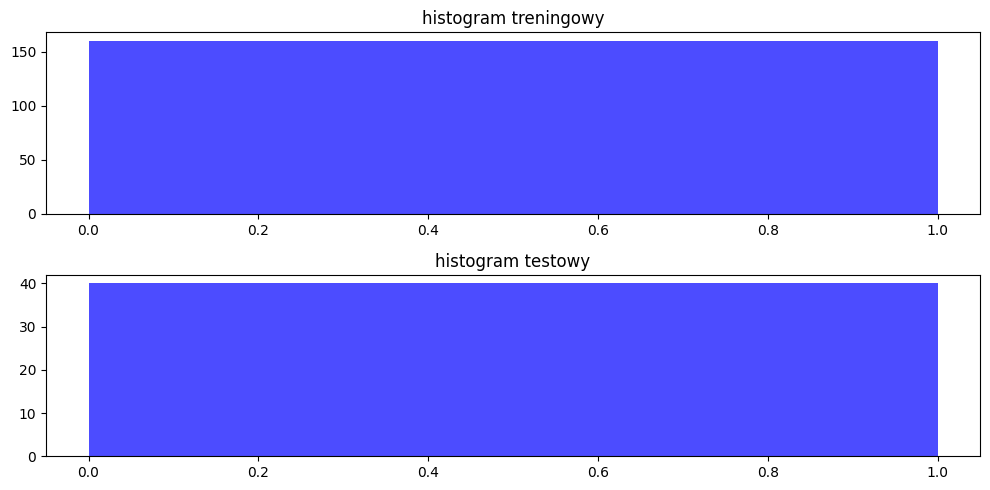

In [170]:
import matplotlib.pyplot as plt
for train_idx, test_idx in splitter_2.split(data_2.loc[:, data_2.columns != output_col], data_2[output_col]):
  train_data = data_2.iloc[train_idx]
  test_data = data_2.iloc[test_idx]
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].hist( train_data[output_col], bins=len(train_data[output_col].unique()), color='blue', alpha=0.7 )
axs[0].set_title('histogram treningowy')

axs[1].hist( test_data[output_col], bins=len(test_data[output_col].unique()), color='blue', alpha=0.7)
axs[1].set_title('histogram testowy')
plt.tight_layout()
plt

Zadanie 4.

Dokonać podziału oryginalnego zbioru danych metodą warstwową względem innego atrybutu (obecnego w pierwotnej wersji zbioru). Jakiego atrybutu i dlaczego warto użyć? Dopuszczalne są niewielkie i uzasadnione zmiany wartości atrybutu stanowiącego źródło proporcji podziału.